In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


logic Fuzzy

In [ ]:

pip install -U scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import skfuzzy as fuzz 
import matplotlib.pyplot as plt

x = np.arange(11)
mfx = fuzz.trimf(x,[0,0,5])
print(x)
print(mfx)



[ 0  1  2  3  4  5  6  7  8  9 10]
[1.  0.8 0.6 0.4 0.2 0.  0.  0.  0.  0.  0. ]


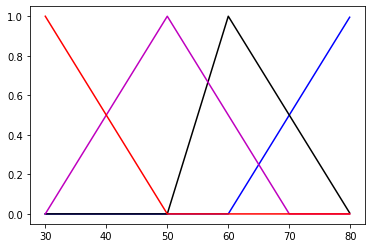

In [ ]:
import numpy as np
import skfuzzy as fuzz 
import matplotlib.pyplot as plt

x=np.arange(30,80,0.1)
slow = fuzz.trimf(x,[30,30,50])
medium = fuzz.trimf(x,[30,50,70])
medium_fast = fuzz.trimf(x,[50,60,80])
full_speed = fuzz.trimf(x,[60,80,80])
plt.figure()
plt.plot(x,full_speed,'b',linewidth=1.5,label='Full Speed')
plt.plot(x,medium_fast,'k',linewidth=1.5,label='Medium Fast')
plt.plot(x,medium,'m',linewidth=1.5,label='Medium')
plt.plot(x,slow,'r',linewidth=1.5,label='Slow')

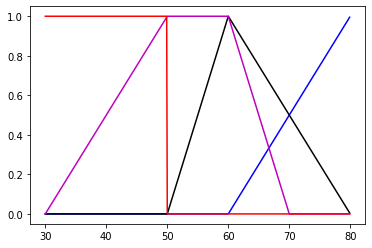

In [ ]:
#cau lenh hinh thang co 4 gia tri ham hinh thang
x=np.arange(30,80,0.1)
slow = fuzz.trapmf(x,[30,30,50,50])
medium = fuzz.trapmf(x,[30,50,60,70])
medium_fast = fuzz.trapmf(x,[50,60,60,80])
full_speed = fuzz.trapmf(x,[60,80,80,80])
plt.figure()
plt.plot(x,full_speed,'b',linewidth=1.5,label='Full Speed')
plt.plot(x,medium_fast,'k',linewidth=1.5,label='Medium Fast')
plt.plot(x,medium,'m',linewidth=1.5,label='Medium')
plt.plot(x,slow,'r',linewidth=1.5,label='Slow')

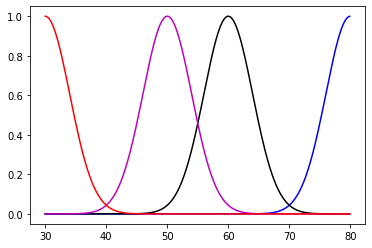

In [ ]:
# phuong trinh ham Gauss
# tam phuong sai
x=np.arange(30,80,0.1)
slow = fuzz.gaussmf(x,30,4)
medium = fuzz.gaussmf(x,50,4)
medium_fast = fuzz.gaussmf(x,60,4)
full_speed = fuzz.gaussmf(x,80,4)
plt.figure()
plt.plot(x,full_speed,'b',linewidth=1.5,label='Full Speed')
plt.plot(x,medium_fast,'k',linewidth=1.5,label='Medium Fast')
plt.plot(x,medium,'m',linewidth=1.5,label='Medium')
plt.plot(x,slow,'r',linewidth=1.5,label='Slow')

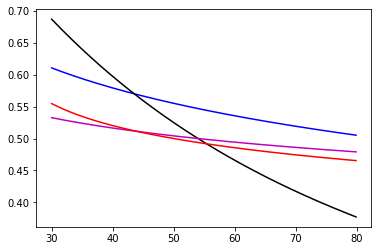

In [ ]:
# ham chuong bell (x,b,c,a)
x=np.arange(30,80,0.1)
slow = fuzz.gbellmf(x,30,0.1,20)
medium = fuzz.gbellmf(x,50,0.1,4)
medium_fast = fuzz.gbellmf(x,50,0.6,4)
full_speed = fuzz.gbellmf(x,80,0.2,4)
plt.figure()
plt.plot(x,full_speed,'b',linewidth=1.5,label='Full Speed')
plt.plot(x,medium_fast,'k',linewidth=1.5,label='Medium Fast')
plt.plot(x,medium,'m',linewidth=1.5,label='Medium')
plt.plot(x,slow,'r',linewidth=1.5,label='Slow')

24.465465465465467


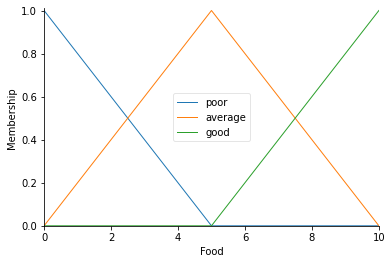

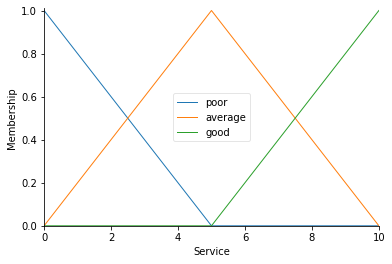

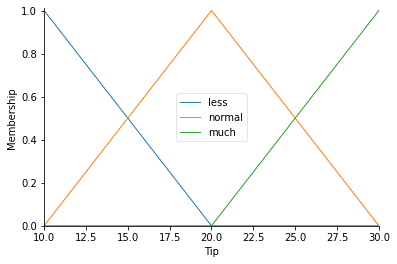

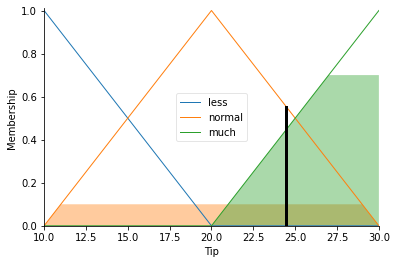

In [ ]:
import numpy as np
import skfuzzy as fuzz 
from skfuzzy  import control as ctrl

food = ctrl.Antecedent(np.arange(0,11,1),'Food') # input
service = ctrl.Antecedent(np.arange(0,11,1),'Service') #input
tip = ctrl.Consequent(np.arange(10,31,1),'Tip') # output

#tao ham tu dong automf(n) n la so le
food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])

service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])
                          
tip['less']=fuzz.trimf(tip.universe,[10,10,20])
tip['normal']=fuzz.trimf(tip.universe,[10,20,30])
tip['much']=fuzz.trimf(tip.universe,[20,30,30])

food.view()
service.view()
tip.view()

# lam luat
rule1 = ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2 = ctrl.Rule(food['poor']&service['average'],tip['less'])
rule3 = ctrl.Rule(food['poor']&service['good'],tip['normal'])

rule4 = ctrl.Rule(food['average']&service['poor'],tip['less'])
rule5 = ctrl.Rule(food['average']&service['average'],tip['normal'])
rule6 = ctrl.Rule(food['average']&service['good'],tip['much'])

rule7 = ctrl.Rule(food['good']&service['poor'],tip['normal'])
rule8 = ctrl.Rule(food['good']&service['average'],tip['much'])
rule9 = ctrl.Rule(food['good']&service['good'],tip['much'])

# train AI 
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

# sao nay doc port cam bien
tipping.input['Food'] = 6.5
tipping.input['Service'] = 9.5
tipping.compute()
print(tipping.output['Tip'])
tip.view(sim=tipping)


ve nha xem phuong trinh toan hoc 